### Multivariable Linear Regression model for investigation of blast performance

### Inputs paramterers given:
Burden in meteres(m)

spacing in meters(m)

Hole diameter in millimeters(mm)

bench height in meters(m)

Stemming in meters(m)

Maximum Charge per dekay in kilograms(kg)

Total charge in a blast in kilograms(kg)

Holedepth in meters(m)

### Outputs obtained

Mean Fragment Size (MFS)

In [ ]:
We will develop a Linearly related model using python libraries that predicts the outcome of the behaviour of source variables given as input.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:\\Users\\babhi\\Downloads\\read2.csv")

In [5]:
data

,9,1,1.67,33.33,1.28,0.26,0.1,10,0.1.1,1.1
0,6.0,1.00,2.50,22.22,1.69,0.71,0.02,10.00,0.02,1.00
1,9.0,1.00,1.67,33.33,0.72,0.46,0.10,10.00,0.09,1.11
2,9.0,1.00,1.67,33.33,1.25,0.27,0.10,10.00,0.09,1.11
3,9.0,1.00,1.67,33.33,0.70,0.47,0.10,10.00,0.08,1.25
4,2.0,1.25,5.10,20.00,1.75,0.70,1.00,9.57,0.76,1.32
...,...,...,...,...,...,...,...,...,...,...
56,2.0,1.10,3.70,21.74,1.00,1.02,1.64,16.90,0.15,10.93
57,2.5,1.40,6.00,32.89,0.80,0.36,1.67,32.00,0.15,11.13
58,2.5,1.20,6.00,32.89,0.80,0.49,1.67,32.00,0.13,12.85
59,2.5,1.20,6.00,32.89,0.80,0.42,1.67,32.00,0.13,12.85


In [6]:
data.isnull().sum()

9        0
1        0
1.67     0
33.33    0
1.28     0
0.26     0
0.1      0
10       0
0.1.1    0
1.1      0
dtype: int64

In [7]:
data = data.iloc[:,:9]

In [8]:
data


,9,1,1.67,33.33,1.28,0.26,0.1,10,0.1.1
0,6.0,1.00,2.50,22.22,1.69,0.71,0.02,10.00,0.02
1,9.0,1.00,1.67,33.33,0.72,0.46,0.10,10.00,0.09
2,9.0,1.00,1.67,33.33,1.25,0.27,0.10,10.00,0.09
3,9.0,1.00,1.67,33.33,0.70,0.47,0.10,10.00,0.08
4,2.0,1.25,5.10,20.00,1.75,0.70,1.00,9.57,0.76
...,...,...,...,...,...,...,...,...,...
56,2.0,1.10,3.70,21.74,1.00,1.02,1.64,16.90,0.15
57,2.5,1.40,6.00,32.89,0.80,0.36,1.67,32.00,0.15
58,2.5,1.20,6.00,32.89,0.80,0.49,1.67,32.00,0.13
59,2.5,1.20,6.00,32.89,0.80,0.42,1.67,32.00,0.13


In [9]:
data.columns = ['B','StoB','HtoB','BtoD','TtoB','PF','Xb','E','D50']

In [10]:
data

,B,StoB,HtoB,BtoD,TtoB,PF,Xb,E,D50
0,6.0,1.00,2.50,22.22,1.69,0.71,0.02,10.00,0.02
1,9.0,1.00,1.67,33.33,0.72,0.46,0.10,10.00,0.09
2,9.0,1.00,1.67,33.33,1.25,0.27,0.10,10.00,0.09
3,9.0,1.00,1.67,33.33,0.70,0.47,0.10,10.00,0.08
4,2.0,1.25,5.10,20.00,1.75,0.70,1.00,9.57,0.76
...,...,...,...,...,...,...,...,...,...
56,2.0,1.10,3.70,21.74,1.00,1.02,1.64,16.90,0.15
57,2.5,1.40,6.00,32.89,0.80,0.36,1.67,32.00,0.15
58,2.5,1.20,6.00,32.89,0.80,0.49,1.67,32.00,0.13
59,2.5,1.20,6.00,32.89,0.80,0.42,1.67,32.00,0.13


In [11]:
data.dtypes

B       float64
StoB    float64
HtoB    float64
BtoD    float64
TtoB    float64
PF      float64
Xb      float64
E       float64
D50     float64
dtype: object

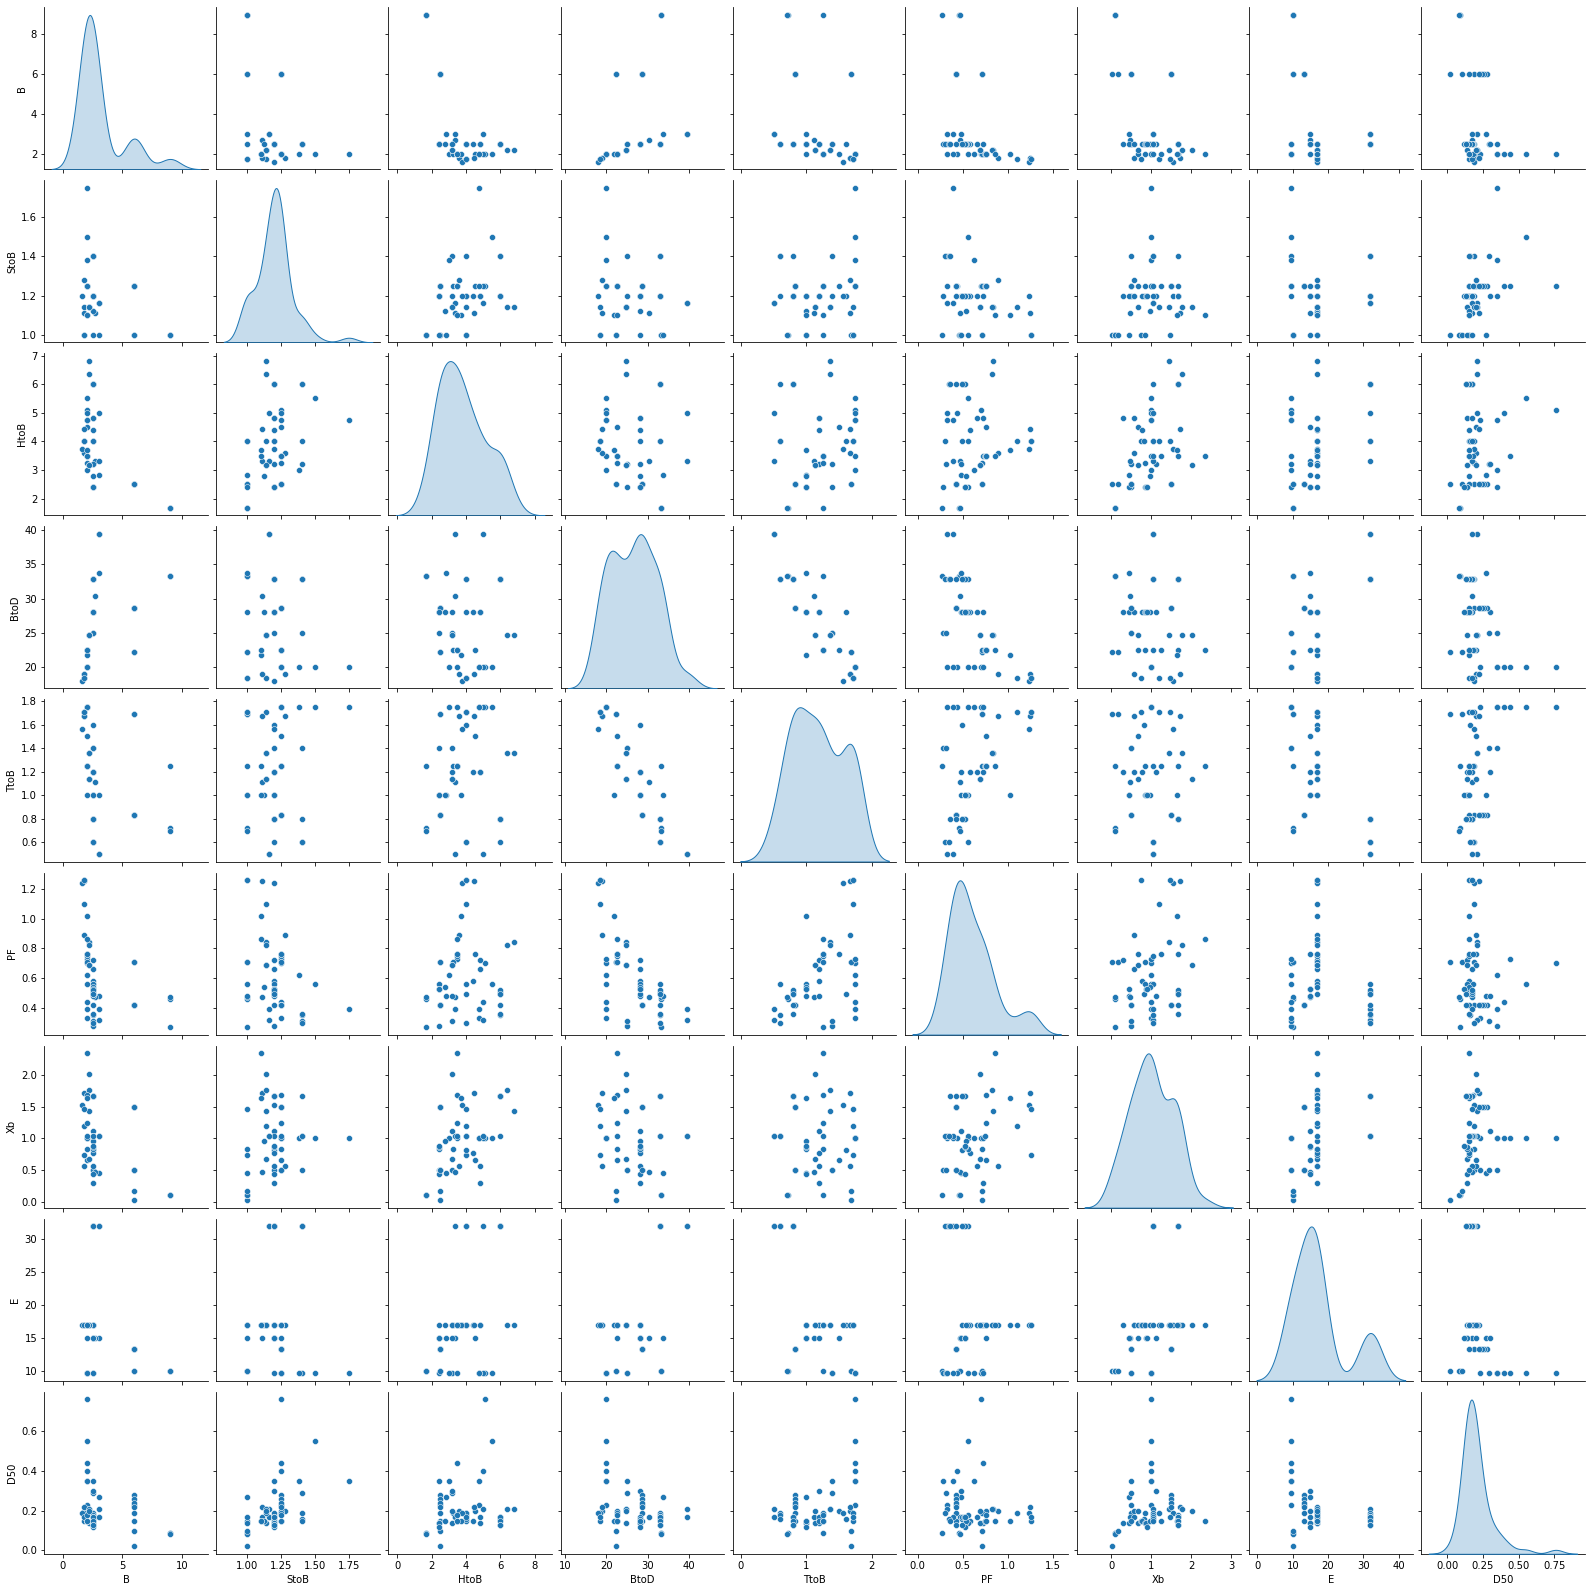

In [12]:
sns.pairplot(data,diag_kind='kde')

In [14]:
x = data.iloc[:,:8]

In [15]:
x

,B,StoB,HtoB,BtoD,TtoB,PF,Xb,E
0,6.0,1.00,2.50,22.22,1.69,0.71,0.02,10.00
1,9.0,1.00,1.67,33.33,0.72,0.46,0.10,10.00
2,9.0,1.00,1.67,33.33,1.25,0.27,0.10,10.00
3,9.0,1.00,1.67,33.33,0.70,0.47,0.10,10.00
4,2.0,1.25,5.10,20.00,1.75,0.70,1.00,9.57
...,...,...,...,...,...,...,...,...
56,2.0,1.10,3.70,21.74,1.00,1.02,1.64,16.90
57,2.5,1.40,6.00,32.89,0.80,0.36,1.67,32.00
58,2.5,1.20,6.00,32.89,0.80,0.49,1.67,32.00
59,2.5,1.20,6.00,32.89,0.80,0.42,1.67,32.00


In [16]:
y = data.iloc[:,8:9]

In [17]:
y

,D50
0,0.02
1,0.09
2,0.09
3,0.08
4,0.76
...,...
56,0.15
57,0.15
58,0.13
59,0.13


In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [19]:
regressionmodel = LinearRegression()
regressionmodel.fit(xtrain,ytrain)

LinearRegression()

In [21]:
xtest


,B,StoB,HtoB,BtoD,TtoB,PF,Xb,E
40,2.50,1.12,2.80,28.09,1.00,0.54,0.96,16.90
42,2.20,1.14,6.82,24.72,1.36,0.84,1.43,16.90
2,9.00,1.00,1.67,33.33,1.25,0.27,0.10,10.00
49,2.20,1.14,6.36,24.70,1.36,0.82,1.77,16.90
51,2.00,1.25,3.50,22.47,1.25,0.76,1.68,16.90
26,2.20,1.14,3.18,24.72,1.14,0.69,0.67,16.90
34,6.00,1.25,2.50,28.57,0.83,0.42,1.50,13.25
36,2.50,1.20,2.40,28.09,1.00,0.53,0.86,15.00
41,2.50,1.40,6.00,32.89,0.60,0.35,1.03,32.00
39,1.75,1.14,4.00,18.42,1.71,1.10,1.19,16.90


In [22]:
ytest

,D50
40,0.15
42,0.21
2,0.09
49,0.21
51,0.18
26,0.14
34,0.26
36,0.14
41,0.16
39,0.19


In [37]:
testdata = np.array(xtest)

In [38]:
testdata.shape

(13, 8)

In [47]:
coef = np.array([-0.01912902,  0.10565736,  0.04204909,  0.00303609,  0.01784411,
        -0.14738604,  0.05079939, -0.01387849])

In [48]:
for j in range(8):
    print(coef[j])

-0.01912902
0.10565736
0.04204909
0.00303609
0.01784411
-0.14738604
0.05079939
-0.01387849


In [52]:


ypred = []
for i in range(13):
    y1 = 0
    for j in range(8):
        y1 += coef[j]*testdata[i][j]
    ypred.append(y1)


        


[0.02601149510000006,
 0.17875284769999994,
 -0.04628301430000001,
 0.1795690579,
 0.0702946586,
 0.005268825500000018,
 0.0543789633,
 0.04040750029999998,
 0.01958233779999996,
 0.00538832039999998,
 0.25484067749999995,
 0.00947567059999993,
 0.024966888300000045]

In [56]:
yorg = np.array(ytest)
yorg

array([[0.15],
       [0.21],
       [0.09],
       [0.21],
       [0.18],
       [0.14],
       [0.26],
       [0.14],
       [0.16],
       [0.19],
       [0.23],
       [0.17],
       [0.22]])

In [64]:
sme = 0
for i in range(13):
    curr = ypred[i]-yorg[i]
    
    sme += curr[0]*curr[0]
sme/=13
sme

0.0181889761916701

In [65]:
sme**0.5

0.13486651249168602

In [44]:
regressionmodel.coef_

array([[-0.01912902,  0.10565736,  0.04204909,  0.00303609,  0.01784411,
        -0.14738604,  0.05079939, -0.01387849]])

In [49]:
for idx,columnames in  enumerate(xtrain.columns):
    print(f'The coefficient of {columnames} is {regressionmodel.coef_[0][idx]}')

The coefficient of B is -0.01912901970108043
The coefficient of StoB is 0.10565735508814354
The coefficient of HtoB is 0.042049090904264085
The coefficient of BtoD is 0.0030360930059659097
The coefficient of TtoB is 0.017844108326632423
The coefficient of PF is -0.14738603681122486
The coefficient of Xb is 0.0507993901638133
The coefficient of E is -0.013878491130130916


In [50]:
intercept = regressionmodel.intercept_
intercept

array([0.16728208])

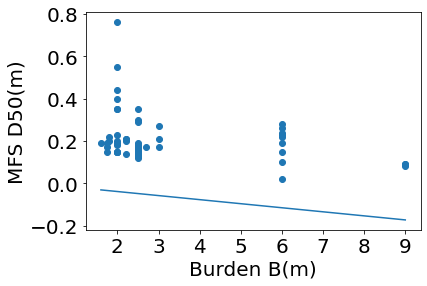

In [87]:
x1 = data['B']
y = data['D50']
plt.scatter(x1,y)
x1nums = np.array([x1.min(),x1.max()])
y1nums = x1nums*-0.01912901970108043
plt.plot(x1nums,y1nums)
plt.xlabel('Burden B(m)')
plt.ylabel('MFS D50(m)')
plt.rcParams['font.size'] = 10
plt.show()

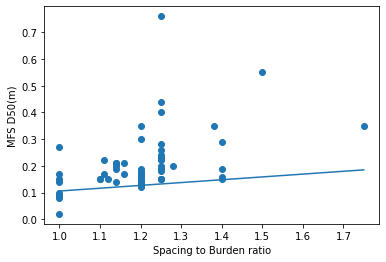

In [68]:
x2 = data['StoB']
y = data['D50']
plt.scatter(x2,y)
x2nums = np.array([x2.min(),x2.max()])
y2nums = x2nums*0.10565735508814354
plt.plot(x2nums,y2nums)
plt.xlabel('Spacing to Burden ratio')
plt.ylabel('MFS D50(m)')
plt.show()

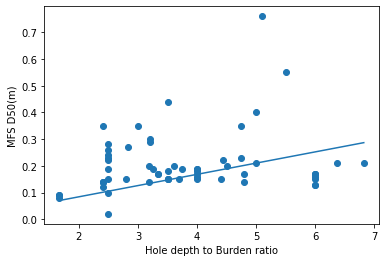

In [77]:
x3 = data['HtoB']
y = data['D50']
plt.scatter(x3,y)
x3nums = np.array([x3.min(),x3.max()])
y3nums = x3nums*0.042049090904264085
plt.plot(x3nums,y3nums)
plt.xlabel('Hole depth to Burden ratio')
plt.ylabel('MFS D50(m)')
plt.show()

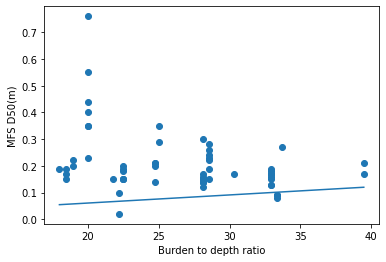

In [72]:
x4 = data['BtoD']
y = data['D50']
plt.scatter(x4,y)
x4nums = np.array([x4.min(),x4.max()])
y4nums = x4nums*0.0030360930059659097
plt.plot(x4nums,y4nums)
plt.xlabel('Burden to depth ratio')
plt.ylabel('MFS D50(m)')
plt.show()

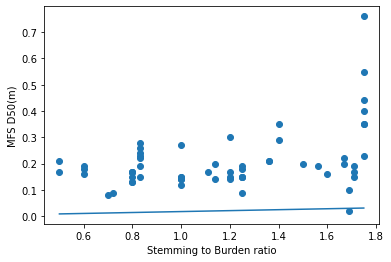

In [73]:
x5 = data['TtoB']
y = data['D50']
plt.scatter(x5,y)
x5nums = np.array([x5.min(),x5.max()])
y5nums = x5nums*0.017844108326632423
plt.plot(x5nums,y5nums)
plt.xlabel('Stemming to Burden ratio')
plt.ylabel('MFS D50(m)')
plt.show()

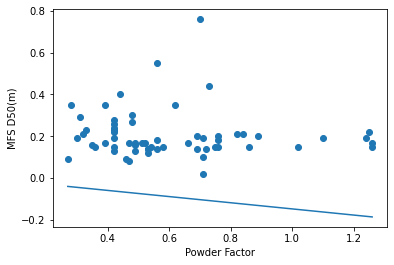

In [74]:
x6 = data['PF']
y = data['D50']
plt.scatter(x6,y)
x6nums = np.array([x6.min(),x6.max()])
y6nums = x6nums*-0.14738603681122486
plt.plot(x6nums,y6nums)
plt.xlabel('Powder Factor')
plt.ylabel('MFS D50(m)')
plt.show()

In [58]:
result = smf.ols(formula = "D50~B+StoB+HtoB+BtoD+TtoB+PF+Xb+E",data=data)

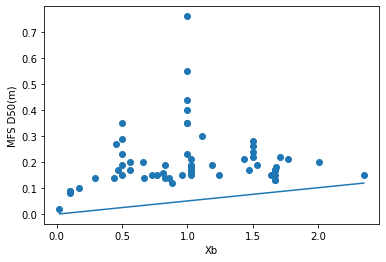

In [75]:
x7 = data['Xb']
y = data['D50']
plt.scatter(x7,y)
x7nums = np.array([x7.min(),x7.max()])
y7nums = x7nums*0.0507993901638133
plt.plot(x7nums,y7nums)
plt.xlabel('Xb')
plt.ylabel('MFS D50(m)')
plt.show()

In [ ]:
x8 = data['Xb']
y = data['D50']
plt.scatter(x7,y)
x7nums = np.array([x7.min(),x7.max()])
y7nums = x7nums*0.0507993901638133
plt.plot(x7nums,y7nums)
plt.xlabel('Xb')
plt.ylabel('MFS D50(m)')
plt.show()

In [59]:
res = result.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    D50   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     6.160
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.41e-05
Time:                        09:13:09   Log-Likelihood:                 66.558
No. Observations:                  61   AIC:                            -115.1
Df Residuals:                      52   BIC:                            -96.12
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2564      0.433     -0.592      0.557      -1.126       0.613
B             -0.0155      0.010     -1.592      0.118      -0.035       0.004
StoB           0.2639      0.139      1.892      0.064      -0.016       0.544
HtoB           0.0211      0.015      1.410      0.165      -0.009       0.051
BtoD           0.0079      0.008      0.961      0.341      -0.009       0.024
TtoB           0.0695      0.085      0.819      0.416      -0.101       0.240
PF            -0.0503      0.105     -0.477      0.635      -0.262       0.161
Xb             0.0501      0.030      1.661      0.103      -0.010       0.111
E             -0.0113      0.004     -2.901      0.005      -0.019      -0.003
==============================================================================
Omnibus:                       52.919   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.925
Skew:                           2.325   Prob(JB):                     8.28e-68
Kurtosis:                      12.996   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""